# NLP process
### Text Analysis 50%
### Text Tansformation 40%
### Model Development 5%
### ui application 5%

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [11]:
# plt.style.available    --- use to see available themes
plt.style.use('ggplot')

In [12]:
sns.set_style('whitegrid')

pip install nltk

In [13]:
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

In [16]:
message = pd.read_csv('E:\Machine-Learning-using-Python\Supervised\spam_ham_dataset.csv', index_col=0)
message.rename({'label':'category'},axis=1,inplace=True)

In [17]:
message.head()

,category,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [18]:
message.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 605 to 4807
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.6+ KB


In [19]:
message.category.value_counts()

ham     3672
spam    1499
Name: category, dtype: int64

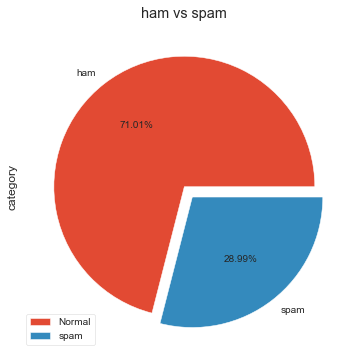

In [21]:
message.category.value_counts().plot(kind='pie',explode=[0,.1],figsize=(6,6),autopct='%.2f%%')
plt.title("ham vs spam")
plt.legend(['Normal',"spam"])
plt.show()

In [22]:
message.groupby('text')['category'].agg([len,np.max]).sort_values(by='len',ascending=False).head(10)


,len,amax
text,,
"Subject: calpine daily gas nomination\r\n>\r\nricky a . archer\r\nfuel supply\r\n700 louisiana , suite 2700\r\nhouston , texas 77002\r\n713 - 830 - 8659 direct\r\n713 - 830 - 8722 fax\r\n- calpine daily gas nomination 1 . doc",20,ham
Subject: \r\n,16,spam
Subject: we ' ve found a school for you !\r\n,3,spam
Subject: you can be smart !\r\n,3,spam
"Subject: \r\nthis week only : f . ree gen . erlc vlag . ra\r\ncover the shipping , and we ' ll send youour product at no cost to prove its\r\neffectiveness .\r\nwon ' t last . . . hurry\r\nstop promos .\r\n",3,spam
"Subject: hpl nom for march 30 , 2001\r\n( see attached file : hplno 330 . xls )\r\n- hplno 330 . xls",2,ham
"Subject: hpl nom for march 28 , 2001\r\n( see attached file : hplno 328 . xls )\r\n- hplno 328 . xls",2,ham
"Subject: tenaska iv - - cleburne march 2001\r\nhere is the spreadsheet for march :\r\nthanks ,\r\nmark",2,ham
"Subject: hpl nom for march 29 , 2001\r\n( see attached file : hplno 329 . xls )\r\n- hplno 329 . xls",2,ham


In [24]:
spam_messages = message[message['category']=='spam']['text']
ham_messages = message[message['category']=='ham']['text']

In [25]:
spam_words= []
ham_words= []

In [26]:
def extract_spam_words(text):
    global spam_words
    words = [word.lower() for word in word_tokenize(text) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    spam_words.extend(words)

def extract_ham_words(text):
    global ham_words
    words = [word.lower() for word in word_tokenize(text) if word.lower() not in stopwords.words('english') and word.lower().isalpha()]
    ham_words.extend(words)

In [27]:
spam_messages.apply(extract_spam_words)

4685    None
4185    None
4922    None
3799    None
3948    None
        ... 
4381    None
4979    None
4162    None
4365    None
4807    None
Name: text, Length: 1499, dtype: object

In [28]:
# for word in word_tokenize("i just keep yapping, while my students sleep"):
#     if word.lower() not in stopwords.words('english'):
#         print(word)

In [ ]:
ham_messages.apply(extract_ham_words)
print(ham_words)

In [34]:
spam_words = np.array(spam_words)
pd.Series(spam_words).value_counts().head(10)

subject        1657
com             992
http            983
company         728
e               638
www             587
information     520
font            515
td              504
get             485
dtype: int64

In [35]:
ham_words = np.array(ham_words)
pd.Series(ham_words).value_counts().head(10)

ect        27794
hou        14562
enron      13110
subject    12806
gas         5722
deal        5578
com         5434
please      5430
meter       4918
cc          4718
dtype: int64

In [36]:
message['messageLength'] = message['text'].apply(len)
message.head()

,category,text,label_num,messageLength
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


C:\Users\varun\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\varun\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


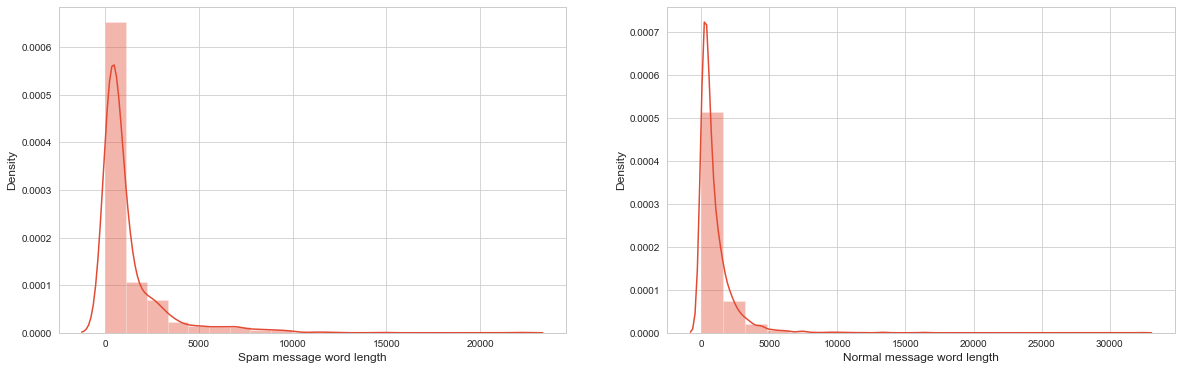

In [37]:
f, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(message[message['category']=='spam']['messageLength'], bins = 20, ax= ax[0])
ax[0].set_xlabel('Spam message word length')
sns.distplot(message[message['category']=='ham']['messageLength'], bins = 20, ax= ax[1])
ax[1].set_xlabel('Normal message word length')
plt.show()

# Text Transformation

In [38]:
from nltk.stem import SnowballStemmer

In [39]:
stemmer = SnowballStemmer('english')

In [40]:
def cleanupText(message):
    message =  message.translate(str.maketrans('','',string.punctuation)) # remove basic puncutation
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words('english')]
    return " ".join(words)

In [41]:
message.text = message.text.apply(cleanupText)

In [42]:
message.head()

,category,text,label_num,messageLength
605,ham,subject enron methanol meter 988291 follow not...,0,327
2349,ham,subject hpl nom januari 9 2001 see attach file...,0,97
3624,ham,subject neon retreat ho ho ho around wonder ti...,0,2524
4685,spam,subject photoshop window offic cheap main tren...,1,414
2030,ham,subject indian spring deal book teco pvr reven...,0,336


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vec = TfidfVectorizer(encoding='latin1',strip_accents='unicode',stop_words="english")
features = vec.fit_transform(message.text)
features = features.toarray()

In [45]:
features.shape

(5171, 42525)

### model application

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [47]:
category_enc = LabelEncoder()
message.category = category_enc.fit_transform(message.category)

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(features, message.category, test_size=.2, random_state=0)

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

In [50]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [51]:
clf = MultinomialNB()
clf.fit(xtrain,ytrain)
ypred =  clf.predict(xtest)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(ytest,ypred)

array([[732,   0],
       [ 85, 218]], dtype=int64)

In [54]:
clf.score(xtest,ytest)

0.9178743961352657

In [55]:
fbeta_score(ytest,ypred,beta=1)

0.836852207293666

In [56]:
import pickle

In [57]:
def save_model(model, path="clf.pk"):
    with open(path,'wb') as file:
        pickle.dump(model, file)
    print("success")

In [58]:
save_model(clf)

success


In [59]:
save_model(vec, 'tfidfvec.pk')

success


In [ ]:
#pip install --upgrade scikit-learn 